# Optimization Algorithm
Based on Nonlinear Conjugate Gradient

---
`Copyright © Cahya AP`

run to import library (**wajib**)

In [20]:
# For standard library
import math
import numpy as np
from scipy.optimize import line_search

# For post processing library
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

---
# Methods


*   Function & grad Function Griewank
*   Plot 3D
*   Plot contour




---
## Griewank
Run to set obj as Griewank (**wajib**)

In [21]:
# Define function
def f(x):
    sigma = (((x[0]**2) + (x[1]**2))/4000)
    gamma = math.cos(x[0])*math.cos(x[1]/(2**0.5))
    y = sigma - gamma + 1

    return (y)

def grad_f(x):
    y1 = (x[0]/2000) + math.sin(x[0])*math.cos(x[1]/(2**0.5))
    y2 = (x[1]/2000) + (1/(2**0.5))*math.cos(x[0])*math.sin(x[1]/(2**0.5))

    y = np.array([y1, y2])
    
    return (y)

---
## Post Processing 
Run the post processing function (**wajib**)

---
reference code for post processing
[(source)](https://ikuz.eu/machine-learning-and-computer-science/the-concept-of-conjugate-gradient-descent-in-python/)

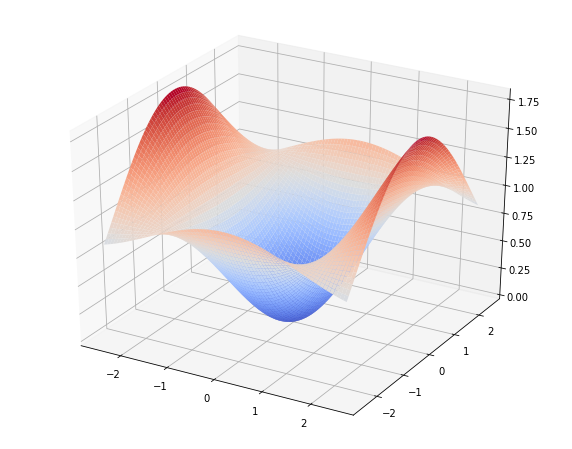

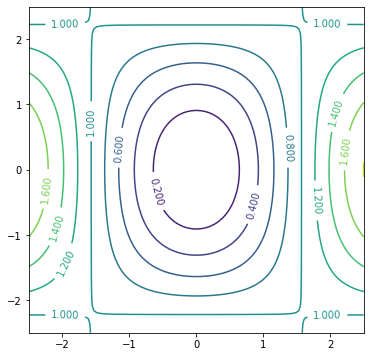

In [22]:
# plotting
def plot_3D():
    # boundary
    lb = -2.5
    ub = 2.5

    fig = plt.figure(figsize=(10, 8))
    qf = fig.gca(projection='3d')
    size = 75
    x1 = list(np.linspace(lb, ub, size))
    x2 = list(np.linspace(lb, ub, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x)
    
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm,
                    linewidth=0)
    fig.show()
    return (x1, x2, zs)

def plot_contours(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
        plt.plot(steps[0,0], steps[0,1], '-o', c='c')
        plt.plot(steps[-1,0], steps[-1,1], 'o', c='r')
    
    fig.show()

def plot_3D_scatter(steps=None, transparency=.5):
    # boundary
    lb = -2.5
    ub = 2.5

    fig = plt.figure(figsize=(10, 8))
    qf = fig.gca(projection='3d')
    #qf.view_init(50, 35)

    size = 75
    x1 = list(np.linspace(lb, ub, size))
    x2 = list(np.linspace(lb, ub, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x)
    
    qf.plot_surface(x1, x2, zs, cmap=cm.coolwarm, antialiased=True, 
                    alpha=transparency)
    
    if steps is not None:
        steps = np.matrix(steps)
        for i in range(len(steps)):
            qf.scatter(steps[i,0], steps[i,1], f([steps[i,0], steps[i,1]]), '-o', c='r')
    

    fig.show()

x1, x2, zs = plot_3D()
plot_contours(x1, x2, zs)

---
# Main Code

## Algorithm
Run before executing (**wajib**)

In [23]:
def non_linear_CG(x, imax=10, eps=0.01):
    # Starting at x
    steps = [(x[0], x[1])]

    # Compute direction, p = -graf_f(x)
    p = -grad_f(x)

    # For iteration
    i = 0

    while (i<imax and np.linalg.norm(-p)>eps):
        # find alpha from line search
        # Based on Lemma 5.6, if we use Fletcher-Reeves algorithm to compute beta,
        # set c1 and c2 such that 0 < c1 < c2 < 1/2 for strong Wolfe linesearch
        c1 = 1e-4
        c2 = 0.45
        alpha,_,_,_,_,_ = line_search(f, grad_f, x, p, c1=c1, c2=c2)

        # update x_i+1
        x = x + alpha*p

        # append new point to steps for post processing
        steps.append((x[0], x[1]))

        # compute p_i+1 = grad_f(x_i+1)
        p_new = -grad_f(x)
        
        # compute beta_i+1
        # from Fletcher-Reeves algorithm
        beta = (np.linalg.norm(p_new)/np.linalg.norm(p))**2      
        
        # update p
        p = p_new + beta*p

        # update pointer
        i += 1

    print('---')
    print(f'Optimization ends in {i} iterations')
    print('Optimized domain = [{:.2e}, {:.2e}]'.format(x[0], x[1]))
    print('Optimized value = {:.2e}'.format(f(x)))

    return (steps)

## Execute

In [38]:
# initial points
#x = np.array([-2.00, 1.20])            # won't make perfectly conjugate
#x = np.array([-2.00, 2.10])            # trapped in local optima
x = np.array([-1.00, 1.00])             # good results

# threshold
max_iter = 500
eps = 1e-4

# Optimized
steps = non_linear_CG(x, imax=max_iter, eps=eps)

---
Optimization ends in 9 iterations
Optimized domain = [-6.74e-06, -9.36e-05]
Optimized value = 2.22e-09


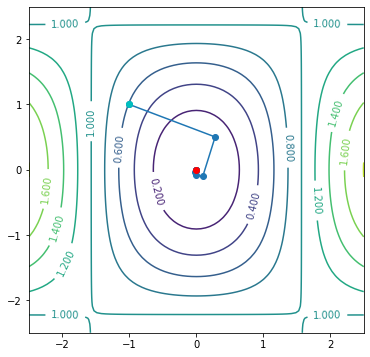

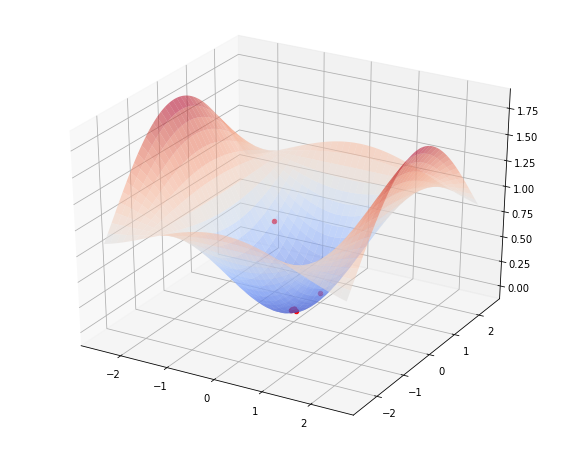

In [39]:
plot_contours(x1, x2, zs, steps)
plot_3D_scatter(steps, transparency=0.55)